In [1]:
import xarray as xr
import numpy as np
import glob as glob
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
import cartopy.feature as cfeature
from matplotlib.animation import FuncAnimation
import imageio.v2 as imageio
import numpy as np
import sparse 
import os

In [2]:
list_files2 = glob.glob("/cluster/work/users/a2021/archive/NSSP534frc2esm_f19_tn14_0509_sugarcane/lnd/hist/NSSP534frc2esm_f19_tn14_0509_sugarcane.clm2.h1.2080_all.nc")
#list_files2 = glob.glob("/cluster/work/users/a2021/archive/NSSP534frc2esm_f19_tn14_bioenergy_sugarcane_OceanNET_2030-2100_2310/atm/hist/NSSP534frc2esm_f19_tn14_bioenergy_sugarcane_OceanNET_2030-2100_2310.cam.h0.*.nc")

list_files2 = sorted(list_files2)
size_iteration = len(list_files2)
print(size_iteration )
## cdo cat 

filename0='/cluster/projects/nn9576k/anusha/DATA/gridarea_km2.nc' 
data0 = xr.open_dataset(filename0, decode_times=False)
area=data0.area
type(area)

0


xarray.core.dataarray.DataArray

In [27]:
filename='/cluster/work/users/a2021/archive/NSSP534frc2esm_f19_tn14_SSP534_sugarcane_withCCS_test/lnd/hist/NSSP534frc2esm_f19_tn14_SSP534_sugarcane_withCCS_test.clm2.h0.2031-08.nc' 
data = xr.open_dataset(filename, decode_times=False)
data.AGNPP

<xarray.DataArray 'AGNPP' (time: 1, lat: 96, lon: 144)>
[13824 values with dtype=float64]
Coordinates:
  * time     (time) float64 973.0
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat      (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
Attributes:
    long_name:     aboveground NPP
    units:         gC/m^2/s
    cell_methods:  time: mean

In [24]:
data

<xarray.DataArray 'STORVEGC' (time: 1, lat: 96, lon: 144)>
[13824 values with dtype=float64]
Coordinates:
  * time     (time) float64 973.0
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat      (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
Attributes:
    long_name:     stored vegetation carbon, excluding cpool
    units:         gC/m^2
    cell_methods:  time: mean

In [3]:
filename='/cluster/work/users/a2021/archive/NSSP534frc2esm_f19_tn14_bioenergy_sugarcane_OceanNET_2030-2100_2310/atm/hist/annual_mean_TREFHT.nc' 
data = xr.open_dataset(filename, decode_times=False)
start_date = '2030-01'
end_date   = '2102-12'
year = pd.date_range(start=start_date, end=end_date, freq='A')
len(year)
data=data.assign_coords(time=year)
data.TREFHT

KeyboardInterrupt: 

In [8]:
filename2='/cluster/projects/nn9576k/anusha/DATA/annual_mean_TREFHT_SSP534_baseline.nc' 
data2 = xr.open_dataset(filename2, decode_times=False)


#start_date = '2030-01'
#end_date   = '2101-12'
#year = pd.date_range(start=start_date, end=end_date, freq='A')
#NPP_cane_nc=NPP_cane_nc.assign_coords(time=monthly_dates)
data.TREFHT
data2.TREFHT
start_date = '2015-01'
end_date   = '2102-12'
year = pd.date_range(start=start_date, end=end_date, freq='A')
len(year)
data2=data2.assign_coords(time=year)
data2.TREFHT

TREFHT_sugarcane = data.TREFHT.mean(['lat', 'lon'])
selected_data_cane = TREFHT_sugarcane.sel(time=slice('2030', '2100'))


TREFHT_base = data2.TREFHT.mean(['lat', 'lon'])
selected_data = TREFHT_base.sel(time=slice('2030', '2100'))


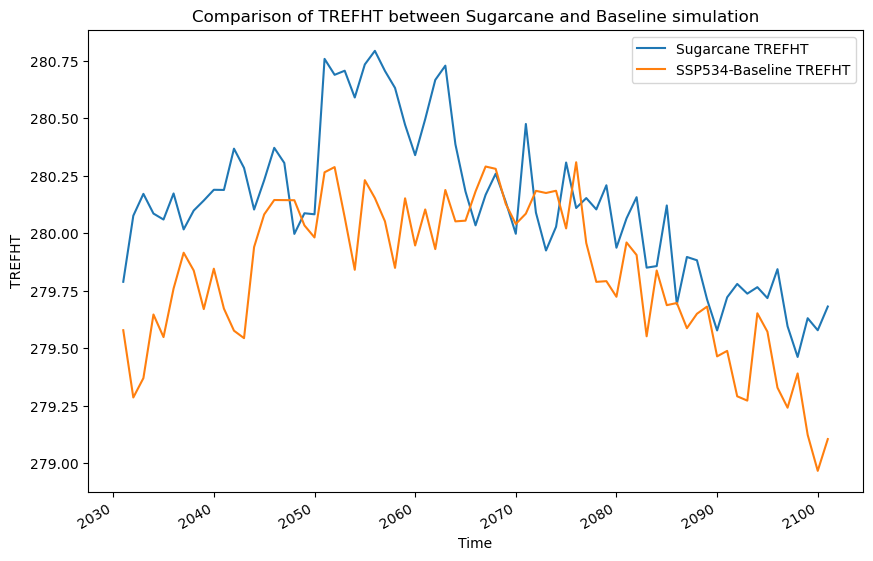

In [9]:


fig, ax = plt.subplots(figsize=(10, 6))  # Create a figure and axis object

# Plot the first time series
selected_data_cane.plot(label='Sugarcane TREFHT', ax=ax)

# Plot the second time series on the same axis
selected_data.plot(label='SSP534-Baseline TREFHT', ax=ax)

# Customize labels and titles
plt.xlabel('Time')
plt.ylabel('TREFHT')
plt.title('Comparison of TREFHT between Sugarcane and Baseline simulation')

# Display legend
plt.legend()

# Show the plot
plt.show()

In [ ]:
start_date = '2030-01'
end_date   = '2100-12'
monthly_dates = pd.date_range(start=start_date, end=end_date, freq='MS')
NPP_cane_nc=NPP_cane_nc.assign_coords(time=monthly_dates)
data=data.sum('time')


In [ ]:
variables = ['TSA', 'T', 'FSNT','FLNT','TREFHT']
dset2.area
float(np.sum((np.multiply(dset2[variables[j]],dset2.area))/np.sum(dset2.area))) 
dset2


variables = ['TREFHT']

results2 = np.zeros((len(variables), (size_iteration)))
for i in range(size_iteration):
    #print(i)
    dset2 = xr.open_dataset(list_files2[:24], decode_times=False)
    #print(dset2)
    for j in range(len(variables)):
       results2[j, i] = float(np.sum((np.multiply(dset2[variables[j]],area))/np.sum(area))) 

In [ ]:
results2 = np.zeros((len(variables), (size_iteration)))
for i in range(size_iteration):
    #print(i)
    dset2 = xr.open_dataset(list_files2[i], decode_times=False)
    #print(dset2)
    for j in range(len(variables)):
       results2[j, i] = float(np.sum((np.multiply(dset2[variables[j]],dset2.area))/np.sum(dset2.area))) 

Text(0.8, -0.3, '0.008')

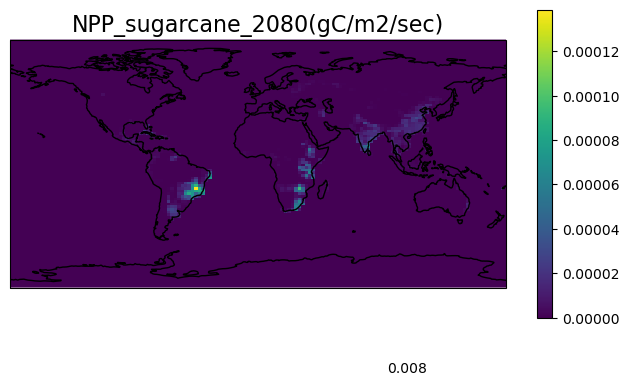

In [30]:
var=NPP_cane_nc.sel(time='2080').sum('time')
annual_yield=var.sum()
fig, axs = plt.subplots(figsize=(8, 4), subplot_kw={'projection': ccrs.PlateCarree()})
var.plot()
axs.coastlines(linewidth=1)
axs.set_title('NPP_sugarcane_2080(gC/m2/sec)', fontsize=16, loc='center')
axs.text(0.8, -0.3, f"{annual_yield:.3f}", fontsize=10, color='k', ha='center', va='top', transform=plt.gca().transAxes)

In [17]:

NPP_cane_annual = NPP_cane_nc.resample(time='A').sum(dim='time')
NPP_cane_peryear =NPP_cane_annual * (86400 * 30.5) # gC/m2/sec to gC/m2/year
NPP_cane_GtC_year=NPP_cane_peryear*(1e-15)*data.area*(1e6) #gC/m²/year to GtC/year

NPP_cane_GtC_year

<xarray.DataArray (time: 71, lat: 96, lon: 144)>
array([[[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]])
Coordinates:
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat      (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
  * time     (time) datetime64[ns] 2030-12-31 2031-12-31 ... 2100-12-31

In [21]:
file_weights = '/cluster/projects/nn9576k/anusha/DATA/weights_sugarcane_NPP_2030-2100_mod.nc'
dset_W = xr.open_dataset(file_weights, decode_times=False)
start_date = '2030'
end_date   = '2101'
years = pd.date_range(start=start_date, end=end_date, freq='A')
dset_W = dset_W.assign_coords(time=years)
dset_W.weights
#weights=dset_W.weights.sel(time=desired_year)
NPP_cane=np.multiply(NPP_cane_GtC_year,dset_W.weights)


NPP_cane.name= "NPP"
NPP_cane.attrs['units'] = "GtC/year"
NPP_cane.attrs['cell_methods'] = "time: mean"
NPP_cane.attrs['_FillValue'] = 1.e+36
NPP_cane.attrs['missing_value'] = 1.e+36
NPP_cane.attrs['long_name'] = "net primary production"
NPP_cane.to_netcdf('NSSP534frc2esm_f19_tn14_bioenergy_sugarcane_OceanNET_2030_2100_h1_GtC_year.nc', mode='w', format='NETCDF4')

<xarray.DataArray (time: 71, lat: 96, lon: 144)>
array([[[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]])
Coordinates:
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat      (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
  * time     (time) datetime64[ns] 2030-12-31 2031-12-31 ... 2100-12-31

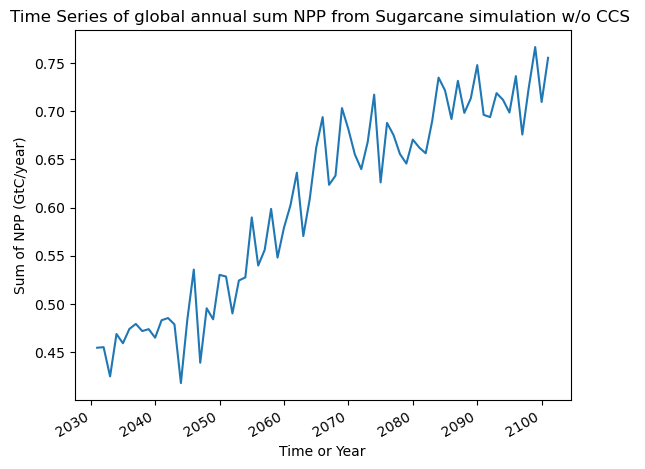

In [24]:
NPP_cane_GtC_sum = NPP_cane.sum(['lat', 'lon'])
NPP_cane_GtC_sum.plot()
plt.xlabel('Time or Year')
plt.ylabel('Sum of NPP (GtC/year)')
plt.title('Time Series of global annual sum NPP from Sugarcane simulation w/o CCS ')
#plt.grid(True)
plt.show()

In [16]:
variables = ['BC_NI_SRF', 'SFBC_A', 'WPTHLP_CLUBB', 'TS', 'T', 'FSNT','FLNT','TREFHT']
results2 = np.zeros((len(variables), (size_iteration)))
results3 = np.zeros((size_iteration))
print(variables[1])
#b=float(np.sum(np.multiply(dset2[variables[1]],np.array(area_grid_cell))/np.sum(area_grid_cell)))
#dset2['TS'] 

SFBC_A


In [26]:
# store in "results"
for i in range(size_iteration):
    #print(i)
    dset2 = xr.open_dataset(list_files2[i], decode_times=False)
    #print(dset2)
    for j in range(len(variables)):
        results2[j, i] = float(np.sum((np.multiply(dset2[variables[j]],np.array(area_grid_cell)))/np.sum(area_grid_cell))) 
    #results3[i] = float(np.sum((np.multiply(dset2[variables[5]-variables[6]],np.array(area_grid_cell)))/np.sum(area_grid_cell)))  
    print(np.sum((np.multiply((dset2[variables[5]]-dset2[variables[6]]),np.array(area_grid_cell))/np.sum(area_grid_cell))))
    results3[i] = np.sum((np.multiply((dset2[variables[5]]-dset2[variables[6]]),np.array(area_grid_cell))/np.sum(area_grid_cell)))
   

<xarray.DataArray ()>
array(6.93607473)
<xarray.DataArray ()>
array(-9.90435123)
<xarray.DataArray ()>
array(-21.6349472)
<xarray.DataArray ()>
array(-26.82785174)
<xarray.DataArray ()>
array(-31.80727757)
<xarray.DataArray ()>
array(-35.68232718)
<xarray.DataArray ()>
array(-36.24715742)
<xarray.DataArray ()>
array(-33.87360043)
<xarray.DataArray ()>
array(-29.11062157)
<xarray.DataArray ()>
array(-24.90794334)
<xarray.DataArray ()>
array(-22.18722189)


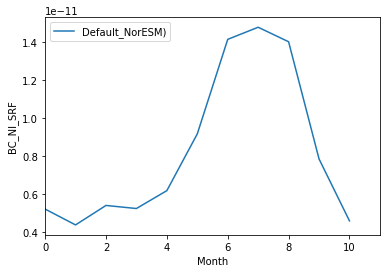

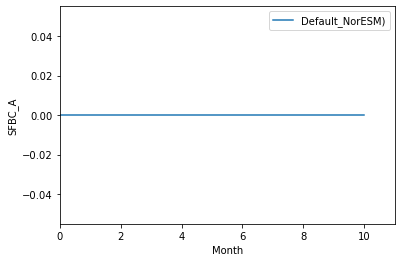

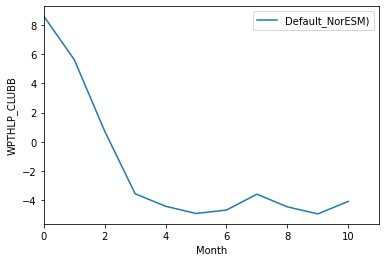

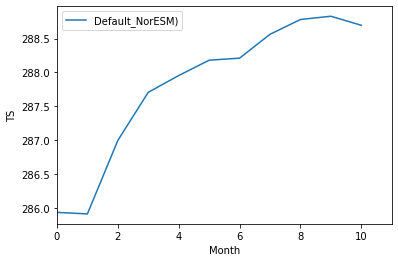

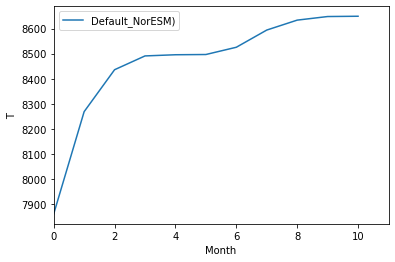

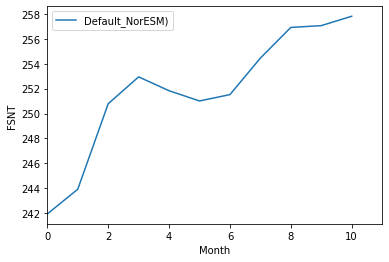

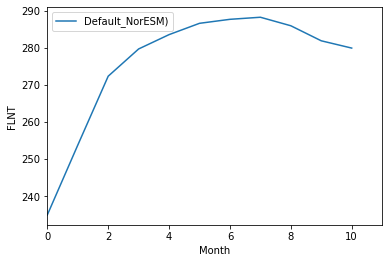

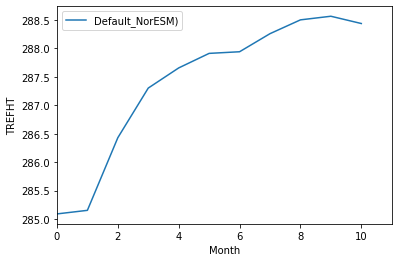

In [6]:
# plot
for k in range(len(variables)):
    fig, ax = plt.subplots()
    #plt.plot(results[k], label='No shipping (control)')
    plt.plot(results2[k], label='Default_NorESM')
    #print(results2[k] / results[k])
    plt.xlim(0,size_iteration)
    plt.xlabel('Month')
    plt.ylabel(variables[k])
    plt.legend()
    #plt.savefig(variables[k]+'.png')

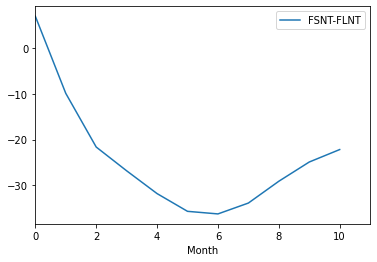

In [29]:

fig, ax = plt.subplots()
#plt.plot(results[k], label='No shipping (control)')
plt.plot(results3, label='FSNT-FLNT')
#print(results2[k] / results[k])
plt.xlim(0,size_iteration)
plt.xlabel('Month')
#plt.ylabel(variables[k])
plt.legend()
plt.show() 


In [41]:
list_files2 = glob.glob("/cluster/work/users/a2021/noresm/NF2018fsst_f09_f09_mg17_2023_final/run/NF2018fsst_f09_f09_mg17_2023_final.cice.h.2018*nc")
list_files2 = sorted(list_files2)
size_iteration = len(list_files2)
list_files2000 = glob.glob("/cluster/work/users/a2021/archive/NF2000fsstdef/ice/hist/NF2000fsstdef.cice.h.0011*")
list_files2000 = sorted(list_files2000)
size_iteration2000 = len(list_files2000)
variables = ['snowfrac', 'fswup', 'dsnow']
#variables = ['landfrac', 'BCDEP', 'EFLX_LH_TOT', 'FLDS']
results2 = np.zeros((len(variables), (size_iteration)))
results2000 = np.zeros((len(variables), (size_iteration)))
for i in range(size_iteration):
    dset2 = xr.open_dataset(list_files2[i], decode_times=False)
    print(dset2['snowfrac'])
    dset2000 = xr.open_dataset(list_files2000[i], decode_times=False)
    for j in range(len(variables)):
        results2[j, i] = float(np.sum((np.multiply(dset2[variables[j]],np.array(area_grid_cell)))/np.sum(area_grid_cell))) 
        results2000[j, i] = float(np.sum((np.multiply(dset2000[variables[j]],np.array(area_grid_cell)))/np.sum(area_grid_cell)))  
        print(results2)



<xarray.DataArray 'snowfrac' (time: 1, nj: 192, ni: 288)>
array([[[     nan,      nan, ...,      nan,      nan],
        [     nan,      nan, ...,      nan,      nan],
        ...,
        [0.841222, 0.84392 , ..., 0.840552, 0.841217],
        [0.824505, 0.824505, ..., 0.824505, 0.824505]]], dtype=float32)
Coordinates:
  * time     (time) float32 7.366e+05
    TLON     (nj, ni) float32 ...
    TLAT     (nj, ni) float32 ...
Dimensions without coordinates: nj, ni
Attributes:
    units:          1
    long_name:      grid cell mean snow fraction
    cell_measures:  area: tarea
    cell_methods:   time: mean
    time_rep:       averaged
[[0.02779308 0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.        ]]
[[0.

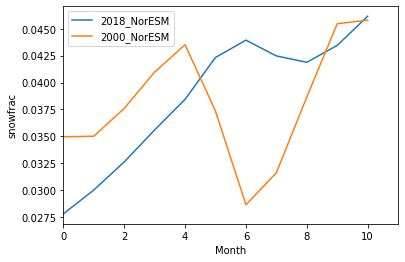

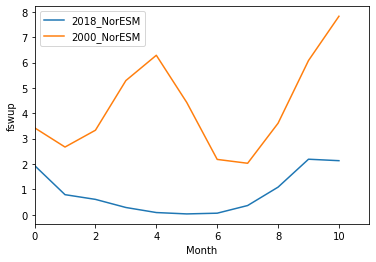

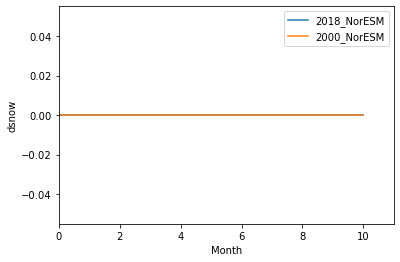

In [37]:
for k in range(len(variables)):
    fig, ax = plt.subplots()
    plt.plot(results2[k], label='2018_NorESM')
    plt.plot(results2000[k], label='2000_NorESM')
    plt.xlim(0,size_iteration)
    plt.xlabel('Month')
    plt.ylabel(variables[k])
    plt.legend()
